In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv("../../data/credit-card-full.csv")

## Extracting a Logistic Regression parameter
### You are now going to practice extracting an important parameter of the logistic regression model. The logistic regression has a few other parameters you will not explore here but you can review them in the scikit-learn.org documentation for the LogisticRegression() module under 'Attributes'.

### This parameter is important for understanding the direction and magnitude of the effect the variables have on the target.

### In this exercise we will extract the coefficient parameter (found in the coef_ attribute), zip it up with the original column names, and see which variables had the largest positive effect on the target variable.

### You will have available:

##### - A logistic regression model object named log_reg_clf
##### - The X_train DataFrame
### sklearn and pandas have been imported for you.

### Instructions
-    Create a list of the original column names used in the training DataFrame.
-    Extract the coefficients of the logistic regression estimator.
-    Create a DataFrame of coefficients and variable names & view it.
-    Print out the top 3 'positive' variables based on the coefficient size.

In [41]:
X = df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df[['SEX']].values.ravel()

log_reg_clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
log_reg_clf.fit(X_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [42]:
# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by="Coefficient", axis=0, ascending=False)[0:3]
print(top_three_df)

     Variable   Coefficient
0   LIMIT_BAL  1.918809e-06
1         AGE  1.148474e-07
2       PAY_0 -3.085230e-09
3       PAY_2 -4.337922e-09
4       PAY_3 -4.160373e-09
5       PAY_4 -4.502522e-09
6       PAY_5 -4.322909e-09
7       PAY_6 -4.187439e-09
8   BILL_AMT1 -9.062914e-07
9   BILL_AMT2 -5.036757e-07
10  BILL_AMT3  2.068118e-07
11  BILL_AMT4 -7.218127e-07
12  BILL_AMT5  1.716888e-06
13  BILL_AMT6  2.108001e-07
14   PAY_AMT1  1.357915e-08
15   PAY_AMT2  3.206915e-07
16   PAY_AMT3 -3.356318e-07
17   PAY_AMT4 -1.713033e-06
18   PAY_AMT5 -4.051017e-07
19   PAY_AMT6 -8.918459e-07
     Variable   Coefficient
0   LIMIT_BAL  1.918809e-06
12  BILL_AMT5  1.716888e-06
15   PAY_AMT2  3.206915e-07


## Extracting a Random Forest parameter
### You will now translate the work previously undertaken on the logistic regression model to a random forest model. A parameter of this model is, for a given tree, how it decided to split at each level.

### This analysis is not as useful as the coefficients of logistic regression as you will be unlikely to ever explore every split and every tree in a random forest model. However, it is a very useful exercise to peek under the hood at what the model is doing.

### In this exercise we will extract a single tree from our random forest model, visualize it and programmatically extract one of the splits.

### You have available:

##### - A random forest model object, rf_clf
##### - An image of the top of the chosen decision tree, tree_viz_image
##### - The X_train DataFrame & the original_variables list
### Instructions
-    Extract the 7th tree (6th index) from the random forest model.
-    Visualize this tree (tree_viz_image) to see the split decisions.
-    Extract the feature & level of the top split.
-    Print out the feature and level together.

In [47]:
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## THhis is a different image, since for some DAMN REASON THE ONE PROVIDED CAN'T OPEN
tree_viz_image = np.array(Image.open("../../imgs/tree_viz_image.jpg"))
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

/tmp/ipykernel_1075301/3407971604.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

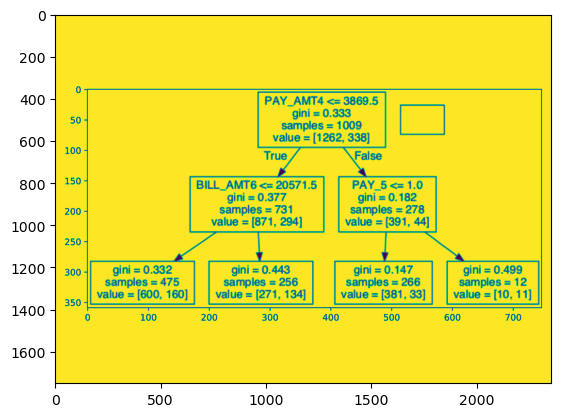

This node split on feature BILL_AMT2, at a value of 5838.5


In [48]:
# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

## Exploring Random Forest Hyperparameters
### Understanding what hyperparameters are available and the impact of different hyperparameters is a core skill for any data scientist. As models become more complex, there are many different settings you can set, but only some will have a large impact on your model.

### You will now assess an existing random forest model (it has some bad choices for hyperparameters!) and then make better choices for a new random forest model and assess its performance.

### You will have available:

##### - X_train, X_test, y_train, y_test DataFrames
##### - An existing pre-trained random forest estimator, rf_clf_old
##### - The predictions of the existing random forest estimator on the test set, rf_old_predictions
### Instructions 1/3
-    Print out the hyperparameters of the existing random forest classifier by printing the estimator and then create a confusion matrix and accuracy score from it. The test set y_test and the old predictions -  rf_old_predictions will be quite useful!

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

rf_clf_old = RandomForestClassifier()
rf_clf_old.fit(X_train, y_train)

rf_old_predictions = rf_clf_old.predict(X_test)

/tmp/ipykernel_1075301/4282793098.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_old.fit(X_train, y_train)


In [53]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  	confusion_matrix(y_test, rf_old_predictions),
  	accuracy_score(y_test, rf_old_predictions))) 

RandomForestClassifier()
Confusion Matrix: 

 [[1258 2698]
 [1195 4749]] 
 Accuracy Score: 

 0.6067676767676767


### Instructions 2/3
-    Create a new random forest classifier with a better n_estimators (try 500) then fit this to the data and obtain predictions.

In [54]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

RandomForestClassifier()
Confusion Matrix: 

 [[1258 2698]
 [1195 4749]] 
 Accuracy Score: 

 0.6067676767676767


/tmp/ipykernel_1075301/1734585567.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)


### Instructions 3/3
-    Assess the performance of the new random forest classifier. Create the confusion matrix and accuracy score and print them out. How does this compare to the first model you were given?

In [55]:
# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

RandomForestClassifier()
Confusion Matrix: 

 [[1258 2698]
 [1195 4749]] 
 Accuracy Score: 

 0.6067676767676767


/tmp/ipykernel_1075301/2492003282.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)


Confusion Matrix: 

 [[1159 2797]
 [1010 4934]]
Accuracy Score: 

 0.6154545454545455


## Hyperparameters of KNN
### To apply the concepts learned in the prior exercise, it is good practice to try out learnings on a new algorithm. The k-nearest-neighbors algorithm is not as popular as it used to be but can still be an excellent choice for data that has groups of data that behave similarly. Could this be the case for our credit card users?

### In this case you will try out several different values for one of the core hyperparameters for the knn algorithm and compare performance.

### You will have available:

##### - X_train, X_test, y_train, y_test DataFrames
### Instructions
-    Build a knn estimator for the following values of n_neighbors [5,10,20].
-    Fit each to the training data and produce predictions.
-    Get an accuracy score for each model and print them out.

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The accuracy of 5, 10, 20 neighbours was 0.5731313131313132, 0.5581818181818182, 0.5887878787878787


## Automating Hyperparameter Choice
### Finding the best hyperparameter of interest without writing hundreds of lines of code for hundreds of models is an important efficiency gain that will greatly assist your future machine learning model building.

### An important hyperparameter for the GBM algorithm is the learning rate. But which learning rate is best for this problem? By writing a loop to search through a number of possibilities, collating these and viewing them you can find the best one.

### Possible learning rates to try include 0.001, 0.01, 0.05, 0.1, 0.2 and 0.5

### You will have available X_train, X_test, y_train & y_test datasets, and GradientBoostingClassifier has been imported for you.

### Instructions
-    Create a learning_rates list for the learning rates, and a results_list to hold the accuracy score of your predictions.
-    Write a loop to create a GBM model for each learning rate mentioned and create predictions for each model.
-    Save the learning rate and accuracy score to a results_list.
-    Turn the results list into a DataFrame and print it out.

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

y = df[['SEX']].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
# Set the learning rates & results storage
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001  0.600404
1          0.010  0.613030
2          0.050  0.620303
3          0.100  0.623131
4          0.200  0.622020
5          0.500  0.609798


## Building Learning Curves
### If we want to test many different values for a single hyperparameter it can be difficult to easily view that in the form of a DataFrame. Previously you learned about a nice trick to analyze this. A graph called a 'learning curve' can nicely demonstrate the effect of increasing or decreasing a particular hyperparameter on the final result.

### Instead of testing only a few values for the learning rate, you will test many to easily see the effect of this hyperparameter across a large range of values. A useful function from NumPy is np.linspace(start, end, num) which allows you to create a number of values (num) evenly spread within an interval (start, end) that you specify.

### You will have available X_train, X_test, y_train & y_test datasets.

### Instructions
-    Create a list of 30 learning rates evenly spread between 0.01 and 2.
-    Create a similar loop to last exercise but just save out accuracy scores to a list.
-    Plot the learning rates against the accuracy score.

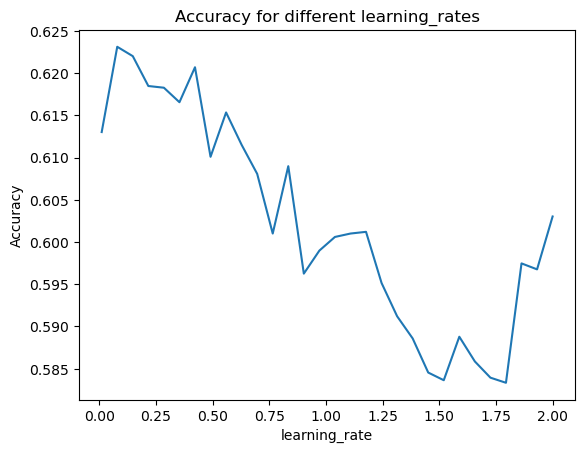

In [67]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
  	# Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()